 ### Environment SET UP

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

### Creating yaml file

In [ ]:
# Save the YAML configuration file in the dataset folder
yaml_path = '/content/drive/MyDrive/vehicle_classification_model/data/data.yaml'

with open(yaml_path, 'w') as file:
    file.write("""
    train: /content/drive/MyDrive/vehicle_classification_model/data/train
    val: /content/drive/MyDrive/vehicle_classification_model/data/valid
    test: /content/drive/MyDrive/vehicle_classification_model/data/test

    nc: 12
    names: ['Motorized2wheleer', 'ambasador_taxi', 'autorickshaw', 'bicycle', 'bus', 'car', 'minitruck', 'motarvan', 'rickshaw', 'toto', 'truck', 'van']
    """)

### Model Training

In [5]:
from ultralytics import YOLO
import os

In [ ]:
# Load YOLOv8n model
model = YOLO('yolov8n.pt')

# Check model architecture
model.info()

100%|██████████| 6.25M/6.25M [00:00<00:00, 80.4MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:
model.train(
    data='/content/drive/MyDrive/vehicle_classification_model/data/data.yaml',  # Path to the data.yaml file
    epochs=50,  # Number of epochs
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/content/drive/MyDrive/vehicle_classification_model',  # Save results in the same directory
    name='vehicle_classification_yolov8',  # Name of the experiment
    device=0,  # Use GPU
    save_period=1
)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/vehicle_classification_model/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/vehicle_classification_model, name=vehicle_classification_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/vehicle_classification_model/data/train/labels... 3893 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3893/3893 [34:27<00:00,  1.88it/s]


train: New cache created: /content/drive/MyDrive/vehicle_classification_model/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/vehicle_classification_model/data/valid/labels... 1298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1298/1298 [11:21<00:00,  1.90it/s]


val: New cache created: /content/drive/MyDrive/vehicle_classification_model/data/valid/labels.cache
Plotting labels to /content/drive/MyDrive/vehicle_classification_model/vehicle_classification_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/vehicle_classification_model/vehicle_classification_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.62G     0.7102      2.542      1.329         10        640: 100%|██████████| 244/244 [01:41<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:20<00:00,  2.00it/s]


                   all       1298       1298      0.575      0.504        0.5      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.4G     0.6811       1.51       1.28         14        640: 100%|██████████| 244/244 [01:36<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.29it/s]

                   all       1298       1298      0.756      0.594      0.668      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.39G     0.6664      1.233      1.261         13        640: 100%|██████████| 244/244 [01:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.30it/s]

                   all       1298       1298      0.784       0.65      0.703      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.39G     0.6506      1.121      1.251         15        640: 100%|██████████| 244/244 [01:36<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.24it/s]

                   all       1298       1298      0.686      0.685      0.716      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.39G     0.6338     0.9887      1.238         13        640: 100%|██████████| 244/244 [01:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.30it/s]

                   all       1298       1298      0.817      0.628      0.735      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.39G     0.6249     0.9104      1.224         12        640: 100%|██████████| 244/244 [01:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.31it/s]


                   all       1298       1298      0.817      0.764      0.864      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.39G     0.6034     0.8477       1.21         14        640: 100%|██████████| 244/244 [01:40<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.28it/s]

                   all       1298       1298      0.774      0.796       0.87      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.38G     0.5973     0.8027      1.201         12        640: 100%|██████████| 244/244 [01:38<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.31it/s]


                   all       1298       1298      0.766      0.814      0.888      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.39G     0.6037     0.7583      1.208         14        640: 100%|██████████| 244/244 [01:40<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.24it/s]

                   all       1298       1298      0.733       0.84      0.875        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.38G     0.5857     0.7098      1.191         10        640: 100%|██████████| 244/244 [01:36<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.29it/s]

                   all       1298       1298      0.822      0.863       0.92      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G     0.5649     0.6805      1.181         16        640: 100%|██████████| 244/244 [01:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.25it/s]

                   all       1298       1298      0.794      0.842        0.9      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G     0.5681     0.6761      1.181         13        640: 100%|██████████| 244/244 [01:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.25it/s]

                   all       1298       1298      0.918       0.86      0.963       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G     0.5638     0.6287      1.179         12        640: 100%|██████████| 244/244 [01:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.33it/s]

                   all       1298       1298      0.865      0.833       0.93      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.39G     0.5635     0.6314      1.175         17        640: 100%|██████████| 244/244 [01:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.29it/s]

                   all       1298       1298        0.9       0.92      0.947      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.39G     0.5442     0.5944       1.16         14        640: 100%|██████████| 244/244 [01:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.32it/s]


                   all       1298       1298      0.892      0.882      0.933      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.38G     0.5445     0.5764      1.158         17        640: 100%|██████████| 244/244 [01:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.36it/s]

                   all       1298       1298      0.872      0.902      0.947      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.38G     0.5381     0.5698      1.165         14        640: 100%|██████████| 244/244 [01:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.29it/s]

                   all       1298       1298      0.866      0.905      0.947      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.39G     0.5405     0.5604      1.159         14        640: 100%|██████████| 244/244 [01:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.25it/s]

                   all       1298       1298      0.899       0.88      0.952      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.38G     0.5318     0.5555       1.15         13        640: 100%|██████████| 244/244 [01:38<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.31it/s]


                   all       1298       1298      0.898      0.926      0.965      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.38G     0.5191      0.523      1.141         15        640: 100%|██████████| 244/244 [01:35<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.37it/s]

                   all       1298       1298      0.861      0.898      0.938      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.39G     0.5199     0.5197      1.141         15        640: 100%|██████████| 244/244 [01:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.34it/s]

                   all       1298       1298       0.94      0.907      0.957      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G       0.52     0.5031      1.145         14        640: 100%|██████████| 244/244 [01:34<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.30it/s]

                   all       1298       1298      0.919      0.876      0.943      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.38G     0.5152     0.4958      1.141         15        640: 100%|██████████| 244/244 [01:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.32it/s]

                   all       1298       1298      0.921      0.895      0.959      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.39G     0.5144      0.497      1.144         12        640: 100%|██████████| 244/244 [01:34<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.37it/s]


                   all       1298       1298      0.953      0.927      0.969      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G     0.5051     0.4847      1.132         17        640: 100%|██████████| 244/244 [01:34<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all       1298       1298      0.956      0.934      0.971      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.38G     0.5084     0.4775      1.137         15        640: 100%|██████████| 244/244 [01:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.32it/s]


                   all       1298       1298      0.954      0.943      0.975      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.39G     0.4924     0.4654      1.126         20        640: 100%|██████████| 244/244 [01:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.26it/s]

                   all       1298       1298      0.938      0.961      0.973      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G      0.498     0.4702      1.127         16        640: 100%|██████████| 244/244 [01:40<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.27it/s]

                   all       1298       1298      0.954      0.948      0.974      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.39G     0.4867     0.4494      1.119         15        640: 100%|██████████| 244/244 [01:35<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.34it/s]

                   all       1298       1298      0.954      0.904      0.973      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.39G     0.4839     0.4463      1.118         11        640: 100%|██████████| 244/244 [01:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.36it/s]

                   all       1298       1298      0.952      0.961      0.975      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G      0.487     0.4369      1.122          9        640: 100%|██████████| 244/244 [01:34<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.25it/s]

                   all       1298       1298      0.961       0.95      0.978      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G     0.4825     0.4195      1.116         11        640: 100%|██████████| 244/244 [01:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:16<00:00,  2.46it/s]

                   all       1298       1298      0.964      0.964       0.98      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.39G     0.4801     0.4255      1.112         14        640: 100%|██████████| 244/244 [01:35<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.31it/s]

                   all       1298       1298      0.945       0.96      0.974      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.38G     0.4752     0.4013      1.112         17        640: 100%|██████████| 244/244 [01:33<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.31it/s]

                   all       1298       1298      0.939      0.949      0.973      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.38G     0.4708     0.4089      1.107         18        640: 100%|██████████| 244/244 [01:36<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all       1298       1298      0.962      0.937      0.974      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.39G     0.4671     0.3996      1.111         13        640: 100%|██████████| 244/244 [01:35<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.40it/s]

                   all       1298       1298      0.938      0.954      0.972      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.4645     0.3897      1.101         13        640: 100%|██████████| 244/244 [01:35<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.31it/s]

                   all       1298       1298      0.955      0.938      0.969      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G     0.4542     0.3851      1.097         15        640: 100%|██████████| 244/244 [01:36<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.40it/s]

                   all       1298       1298      0.958      0.936      0.977      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G     0.4543     0.3855      1.104         16        640: 100%|██████████| 244/244 [01:35<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.33it/s]

                   all       1298       1298      0.945      0.946      0.977      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.39G     0.4596     0.3775      1.101         16        640: 100%|██████████| 244/244 [01:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.34it/s]

                   all       1298       1298       0.96      0.946      0.975      0.854


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G     0.3323     0.2671      1.093          5        640: 100%|██████████| 244/244 [01:34<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.29it/s]


                   all       1298       1298      0.957      0.942      0.976      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G     0.3222     0.2513      1.079          5        640: 100%|██████████| 244/244 [01:33<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.36it/s]

                   all       1298       1298      0.931      0.962      0.974       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.38G     0.3129     0.2387      1.072          5        640: 100%|██████████| 244/244 [01:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]


                   all       1298       1298      0.964      0.945      0.971      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.38G     0.3061      0.225      1.067          5        640: 100%|██████████| 244/244 [01:33<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.28it/s]

                   all       1298       1298      0.967      0.947      0.972      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.38G     0.3039     0.2225      1.062          5        640: 100%|██████████| 244/244 [01:34<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:18<00:00,  2.25it/s]

                   all       1298       1298      0.964      0.953      0.973      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.38G     0.3017      0.215      1.059          5        640: 100%|██████████| 244/244 [01:34<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.36it/s]

                   all       1298       1298      0.961      0.969      0.977       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.38G     0.2923     0.2108       1.06          5        640: 100%|██████████| 244/244 [01:34<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.38it/s]

                   all       1298       1298      0.965      0.952      0.977      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.38G     0.2874     0.1994      1.047          5        640: 100%|██████████| 244/244 [01:34<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.41it/s]

                   all       1298       1298      0.961      0.952      0.976      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.38G     0.2851     0.1981      1.047          5        640: 100%|██████████| 244/244 [01:34<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.36it/s]

                   all       1298       1298      0.961      0.955      0.977      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.38G     0.2843     0.1994      1.045          5        640: 100%|██████████| 244/244 [01:35<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:17<00:00,  2.30it/s]


                   all       1298       1298      0.965      0.962       0.98      0.873

50 epochs completed in 1.610 hours.
Optimizer stripped from /content/drive/MyDrive/vehicle_classification_model/vehicle_classification_yolov8/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/vehicle_classification_model/vehicle_classification_yolov8/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/vehicle_classification_model/vehicle_classification_yolov8/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:20<00:00,  2.01it/s]


                   all       1298       1298      0.966       0.96       0.98      0.871
     Motorized2wheleer        161        161      0.997          1      0.995      0.841
        ambasador_taxi        145        145      0.979      0.979      0.974      0.825
          autorickshaw        158        158      0.995      0.994      0.995      0.928
               bicycle         50         50      0.979      0.923      0.959      0.739
                   bus        174        174          1      0.992      0.995      0.939
                   car        179        179      0.983      0.994      0.994      0.963
             minitruck         54         54      0.904      0.875      0.952      0.854
              motarvan         11         11      0.932          1      0.995      0.805
              rickshaw        166        166      0.984          1      0.995      0.922
                  toto          8          8          1      0.941      0.995      0.883
                 truc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f95768021d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

### Model Evaluation on Validation Data

In [11]:
results = model.val()

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/vehicle_classification_model/data/valid/labels.cache... 1298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1298/1298 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:34<00:00,  2.39it/s]


                   all       1298       1298      0.965      0.962       0.98      0.871
     Motorized2wheleer        161        161      0.996          1      0.995       0.84
        ambasador_taxi        145        145      0.978      0.979      0.974      0.824
          autorickshaw        158        158      0.994      0.994      0.995      0.928
               bicycle         50         50      0.979      0.925      0.958      0.734
                   bus        174        174          1      0.992      0.995       0.94
                   car        179        179      0.981      0.994      0.994      0.961
             minitruck         54         54      0.905       0.88      0.951      0.853
              motarvan         11         11      0.925          1      0.995      0.805
              rickshaw        166        166      0.983          1      0.995      0.924
                  toto          8          8          1      0.947      0.995      0.883
                 truc

### Model Evaluation on Test Data

In [7]:
model = YOLO('/content/drive/MyDrive/vehicle_classification_model/vehicle_classification_yolov8/weights/best.pt')

In [9]:
results = model.val(
    data='/content/drive/MyDrive/vehicle_classification_model/data/data.yaml',  # Path to your YAML file
    split='test',  # Specify that you want to evaluate on the test set
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/content/drive/MyDrive/vehicle_classification_model',
    name='test_evaluation'
)

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/vehicle_classification_model/data/test/labels.cache... 1296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1296/1296 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [08:22<00:00,  6.20s/it]


                   all       1296       1296      0.966       0.96      0.974      0.876
     Motorized2wheleer        158        158      0.994      0.987      0.995      0.847
        ambasador_taxi        148        148      0.956      0.959      0.953      0.822
          autorickshaw        180        180      0.995      0.989      0.995      0.939
               bicycle         41         41      0.952      0.975       0.99      0.739
                   bus        188        188      0.983          1      0.995       0.95
                   car        148        148      0.977      0.986      0.994      0.962
             minitruck         68         68      0.912      0.941      0.935      0.848
              motarvan          8          8      0.947          1      0.995      0.809
              rickshaw        154        154      0.956          1      0.991      0.915
                  toto         11         11          1       0.79      0.884      0.871
                 truc

## Inference on New Images

In [12]:
# Define the path to your test images
test_images_path = '/content/drive/MyDrive/vehicle_classification_model/data/inference_images'

# Run inference
inference_results = model.predict(
    source=test_images_path,  # Path to the folder containing test images
    save=True,  # Save the prediction images with bounding boxes
    save_txt=True,  # Save the prediction labels in .txt format
    project='/content/drive/MyDrive/vehicle_classification_model/data/inference_images',
    name='inference_results'  # Folder name for the inference results
)


image 1/5 /content/drive/MyDrive/vehicle_classification_model/data/inference_images/1.jpg: 416x640 1 car, 153.6ms
image 2/5 /content/drive/MyDrive/vehicle_classification_model/data/inference_images/2.jpg: 608x640 1 ambasador_taxi, 222.8ms
image 3/5 /content/drive/MyDrive/vehicle_classification_model/data/inference_images/3.jpg: 608x640 1 car, 220.1ms
image 4/5 /content/drive/MyDrive/vehicle_classification_model/data/inference_images/4.jpg: 608x640 1 ambasador_taxi, 223.7ms
image 5/5 /content/drive/MyDrive/vehicle_classification_model/data/inference_images/5.jpg: 608x640 1 bus, 1 truck, 204.0ms
Speed: 3.3ms preprocess, 204.8ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)
Results saved to /content/drive/MyDrive/vehicle_classification_model/data/inference_images/inference_results
5 labels saved to /content/drive/MyDrive/vehicle_classification_model/data/inference_images/inference_results/labels


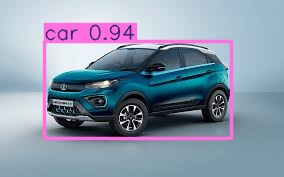

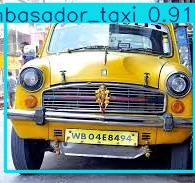

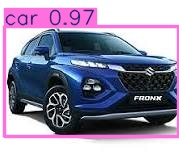

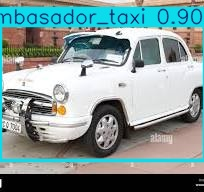

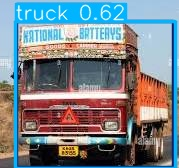

In [13]:
from IPython.display import Image, display
import glob

# Display a few inference results
result_images = glob.glob('/content/drive/MyDrive/vehicle_classification_model/data/inference_images/inference_results/*.jpg')
for image_path in result_images:  # Display the first 5 images
    display(Image(filename=image_path))